1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from matplotlib.ticker import MultipleLocator
import pickle
from scipy.stats import f


import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import matplotlib.cm as cm
import math

%matplotlib inline

Global minima 1 : f( [ 0.08984184 -0.71265628] ) =  -1.0316284534896591
Global minima 2 : f( [-0.08984185  0.71265627] ) =  -1.0316284534896496
Global minima for initial guess (0,0) : f( [0. 0.] ) =  0.0
The result for initial guess is wrong, since it's not global minima.


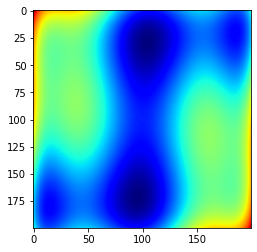

In [103]:
def f(x0):
    [x, y] = x0
    return (4 - 2.1 * (x**2) + (x**4) / 3) * (x**2) + x*y + (4*(y**2) - 4) * (y**2)

x = np.arange(-2, 2, 0.02)
y = np.arange(-1, 1, 0.01)

xv, yv = np.meshgrid(x, y)
xy = f([xv, yv])

plt.imshow(xy, cmap= 'jet')

gmin1 = optimize.minimize(f, [-2, -1])
gmin2 = optimize.minimize(f, [+2, +1])

print("Global minima 1 : f(",gmin1.x,") = ", gmin1.fun)
print("Global minima 2 : f(",gmin2.x,") = ", gmin2.fun)

gmin3 = optimize.minimize(f, [0, 0])
print("Global minima for initial guess (0,0) : f(", gmin3.x,") = ", gmin3.fun)
print("The result for initial guess is wrong, since it's not global minima.")

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

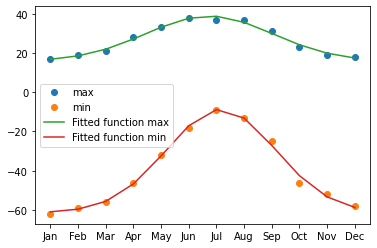

In [40]:
max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, max,'o', label='max')
plt.plot(months, min,'o', label='min')

def gaussian(x, mu, sig, ampl, offset):
    return offset + ampl * scipy.stats.norm.pdf(x, mu, sig)

opt_max, cov_max = scipy.optimize.curve_fit(gaussian, range(12), max, p0=[6,1,20,40])
opt_min, cov_min = scipy.optimize.curve_fit(gaussian, range(12), min, p0=[6,1,0,-60])

plt.plot(months, gauss(range(12), opt_max[0], opt_max[1],opt_max[2],opt_max[3]),label='Fitted function max')
plt.plot(months, gauss(range(12), opt_min[0], opt_min[1],opt_min[2],opt_min[3]),label='Fitted function min')
plt.legend()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

n degrees of freedom = 199
chi2 = inf
p-value = 0.0
p value is <0.05, the fit is unsatisfactory


C:\Users\Hp\AppData\Local\Temp/ipykernel_2188/1890551049.py:27: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(((h - gauss(bin_centres, *par))**2) / sig_y)


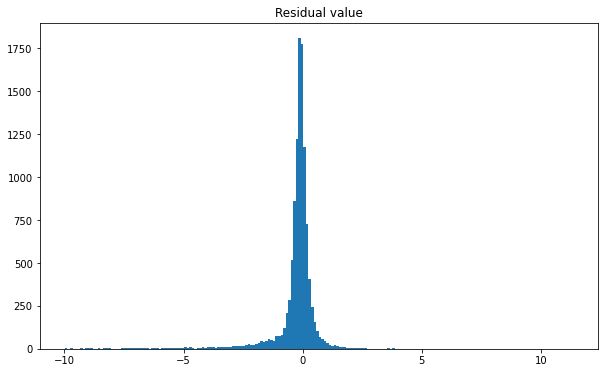

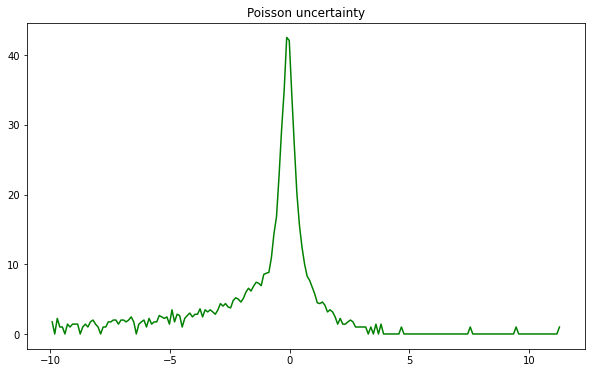

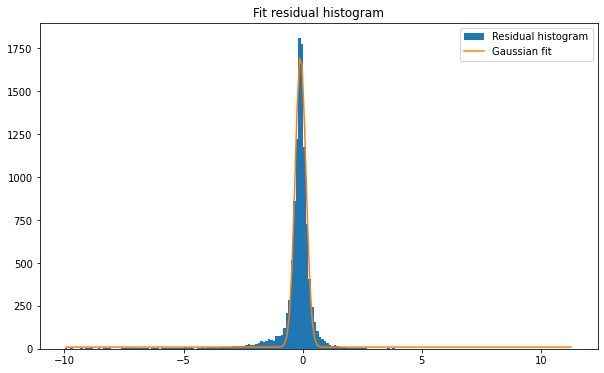

In [65]:
data = pd.DataFrame(np.load('residuals_261.pkl',allow_pickle=True).item())
data = data[data['residuals'] > -10]

fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(data['residuals'], bins=200)
bin_centres = (bins[:-1] + bins[1:])/2
ax.set_title('Residual value')

fig, ax = plt.subplots(figsize=(10, 6))
sig_y = np.sqrt(np.abs(h))
ax.plot(bin_centres, sig_y, color="green")
ax.set_title('Poisson uncertainty')

par, par_cov = optimize.curve_fit(gauss, bin_centres, h, full_output=False)

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(data['residuals'], bins=200, label='Residual histogram')
plt.plot(bin_centres, gauss(bin_centres, *par), label='Gaussian fit')

ax.set_title('Fit residual histogram')
ax.legend()


ndof = len(bin_centres) - 1
print("n degrees of freedom =", ndof)

chi2 = np.sum(((h - gauss(bin_centres, *par))**2) / sig_y)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 
print("p value is <0.05, the fit is unsatisfactory")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

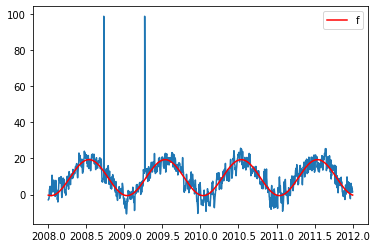

Parameters
a =  -9.988133689134516
b =  12.333023014196588
c =  9.38411486809072
Overall average temperature is  9.384097734976043
Coldest temperature is  -0.6037388871173217
Hottest temperature is  19.372195568442635
The b parameter allows the function to shift along the x axis.


In [102]:
def f(t, a, b ,c):
    return a * np.cos(2*math.pi*t + b) + c

data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", names=['year', 'temp'])
data = data[(data['year'] >= 2008) & (data['year'] <= 2012)]
fig, ax = plt.subplots()

ax.plot(data['year'],data['temp'])

par_1,_ = optimize.curve_fit(f, data['year'], data['temp'])

f_fit = f(data['year'], *par_1)
ax.plot(data['year'], f_fit,'r-', label="f")
ax.legend()
plt.show()

print('Parameters')
print('a = ', par_1[0])
print('b = ', par_1[1])
print('c = ', par_1[2])
print("Overall average temperature is ", data['temp'].mean())
print("Coldest temperature is ", f_fit.min())
print("Hottest temperature is ", f_fit.max())
print("The b parameter allows the function to shift along the x axis.")
